<a href="https://colab.research.google.com/github/nattanan13/-nattanan/blob/main/Workshop7_640631119_Nattanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from collections import Counter

# Import Dataset

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/workshop7/workshop7/Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#drop column ID 
df.columns
data = df.drop(df.columns[0], axis=1)

In [ ]:
#rename columns name
data.rename(columns = {'SepalLengthCm': 'sepal_length', 'SepalWidthCm'	: 'sepal_width', 'PetalLengthCm': 'petal_length', 'PetalWidthCm': 'petal_width' }, inplace = True)

In [ ]:
# numerical statistics of dataset
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


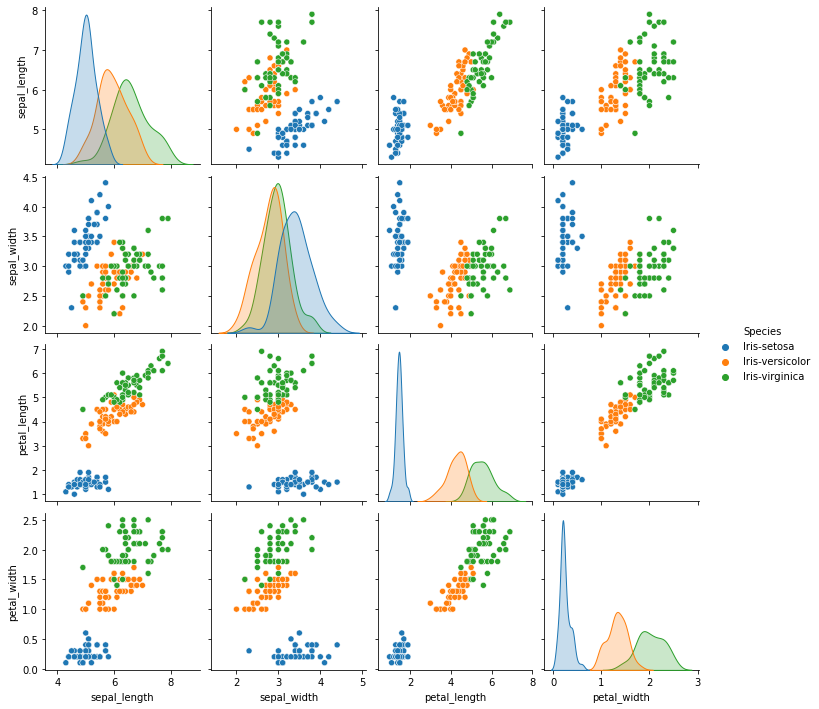

In [ ]:
# view the relationships between variables; color code by species type
sns.pairplot(data, hue="Species")

# Create function of K-Nearest Neighbors Classifier 

split data into training and test sets

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length', 'sepal_width', 
                                                        'petal_length', 'petal_width']],
                                                    data['Species'], random_state = 0)

In [ ]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Create function to calculate Euclidean distance

In [ ]:
# calculate the distance by create a function
# Euclidean distance (p=2)
# E(x,y) = sqrt(sum(x-y)**2)
def CalEucli_distance(a, b, p=2):
  #set initial distance = 0
  distance = 0
  distance = np.sqrt(sum((a-b)**2))
  return distance

In [ ]:
# Test Eucli_distance function
CalEucli_distance(X_test.iloc[1], X_train.iloc[2], p=2)

2.177154105707724

In [ ]:
# Calculate distance between X_test and all points in X_train
for i in X_test.index:
  #initial distance array
  Eucli_distances = []
  for j in X_train.index: 
   Eucli_distances.append(CalEucli_distance(X_test.loc[i], X_train.loc[j], p=2))
  # Create data frame to keep all distances  
  Eucli_dists = pd.DataFrame(data=Eucli_distances, index=y_train.index, columns=['EuclDist'])
  # sort by value and get k_Neighbors
  Eucli_dists = Eucli_dists.sort_values(by=['EuclDist'])
Eucli_dists

,EuclDist
133,0.331662
101,0.360555
142,0.360555
149,0.374166
123,0.412311
...,...
41,4.305810
14,4.347413
38,4.364631
42,4.382921


In [ ]:
from collections import Counter
# Create counter object to track the labels
collect = Counter(y_train[Eucli_dists.index])
print(collect)
# Get most common label of all the nearest neighbors
prediction = collect.most_common()[0][0]

Counter({'Iris-virginica': 41, 'Iris-setosa': 37, 'Iris-versicolor': 34})


# create function to predict Yhat


In [ ]:
# set k value that a number of Neighbors:
Knum_neighbors = 3

In [ ]:
# Euclidean distance (p=2)
p = 2

In [ ]:
def knn_predict(X_train, y_train, X_test, Knum_neighbors, p):  
    # Counter to help find most common label
  from collections import Counter
    # Make predictions on the test data
    #initial y_hat_test array
  answer_Yhat = []


  for i in X_test.index:
  #initial distance array
    Eucli_distances = []
    for j in X_train.index:
     Eucli_distances.append(CalEucli_distance(X_test.loc[i], X_train.loc[j])) 
  # Create data frame to keep all distances  
    Eucli_dists = pd.DataFrame(data=Eucli_distances, index= y_train.index, columns=['EuclDist'])
  # sort by value and get k_Neighbors
    Eucli_dists = Eucli_dists.sort_values(['EuclDist'])
  # Sort distances, and only consider the k closest points
    Eucli_dists = Eucli_dists.sort_values(['EuclDist']).head(Knum_neighbors)
  # Create counter object to track the labels
    collect = Counter(y_train[Eucli_dists.index])
  # Get most common label of all the nearest neighbors
    prediction = collect.most_common()[0][0]
  # Append prediction to output list
    answer_Yhat.append(prediction)  
  return answer_Yhat


# Make predictions on testset

In [ ]:
answer_Yhat = knn_predict(X_train, y_train, X_test, Knum_neighbors, p)
answer_Yhat

['Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica']

In [ ]:
# Get test accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, answer_Yhat))

0.9736842105263158


In [ ]:
#  TO show the result which compare Y(hat) with Y(actual) 
pd.concat([X_test, y_test, pd.Series(answer_Yhat, name='answer_Yhat', index=X_test.index)], 
          ignore_index=False, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,Species,answer_Yhat
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


# KNN use scikit-learn KNeighborsClassifier

split data into new training and test sets for knn

In [ ]:
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(data[['sepal_length', 'sepal_width', 
                                                        'petal_length', 'petal_width']],
                                                    data['Species'], random_state = 0)

In [ ]:
# use from sklearn.neighbors import KNeighborsClassifier
knn_Neighbors = 3
knn = KNeighborsClassifier(n_neighbors= knn_Neighbors)
knn.fit(KNN_X_train, KNN_y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Result of Knn_Y_Predicted

In [ ]:
answer_knn = knn.predict(KNN_X_test)
answer_knn

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [ ]:
# TO show the result which compare Y(hat) with Y(actual) 
pd.concat([KNN_X_test, KNN_y_test, pd.Series(answer_knn, name = "Predict", index=KNN_X_test.index)],
          ignore_index = False, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,Species,Predict
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [ ]:
# Get test accuracy score of KNN
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, answer_knn))

0.9736842105263158


# Compare KNN use scikit-learn  VS Create function to calculate K-Nearest 


In [ ]:
# KNN use scikit-learn
print(accuracy_score(y_test, answer_knn))
print(metrics.confusion_matrix(y_test, answer_knn))
print(metrics.classification_report(y_test, answer_knn))

0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
# knn_predict(X_train, y_train, X_test, Knum_neighbors, p)
print(accuracy_score(y_test, answer_Yhat))
print(metrics.confusion_matrix(y_test, answer_Yhat))
print(metrics.classification_report(y_test, answer_Yhat))

0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

